# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [44]:
df = pd.read_csv("df_clustered.csv")
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Performance
0,2023-06-04,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1.0,93.769249,Moderate
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,Low
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,Low
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,Moderate
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,Low


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

### Encoding Variabel Kategorik
Sebelum melakukan analisis data, dilakukan Encoding pada fitur kategorik untuk mengonversi data kategorik menjadi numerik agar dapat diproses oleh algoritma.

In [45]:
categorical_cols = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Splitting Variabel Fitur dan Target

In [46]:
X = df[['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD', 
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage'] + categorical_cols]

y = df['Ship_Performance']

Selanjutnya dilakukan juga standarisasi pada fitur numerik untuk menyamakan skala variabel numerik untuk mengoptimalkan model.

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pada analisis ini digunakan split data latih dan data uji dengan perbandingan 80:20.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

#### Decision Tree

Model ini bekerja dengan membagi data berdasarkan aturan berbasis pohon keputusan, di mana setiap percabangan mewakili kondisi yang memisahkan kelas-kelas dalam dataset.

In [49]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

#### Support Vector Machine (SVM)

SVM menggunakan hyperplane untuk memisahkan kelas dalam ruang fitur, dengan tujuan memaksimalkan margin antara kelas yang berbeda. 

In [50]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

#### Naive Bayes

Model ini didasarkan pada teorema Bayes, dengan asumsi bahwa setiap fitur bersifat independen satu sama lain. 

In [51]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

#### Decision Tree

In [52]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Model: Decision Tree")
print(f"Accuracy: {acc_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Model: Decision Tree
Accuracy: 0.9033
Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.87      0.88       169
         Low       0.92      0.86      0.89       154
    Moderate       0.90      0.96      0.93       225

    accuracy                           0.90       548
   macro avg       0.90      0.90      0.90       548
weighted avg       0.90      0.90      0.90       548



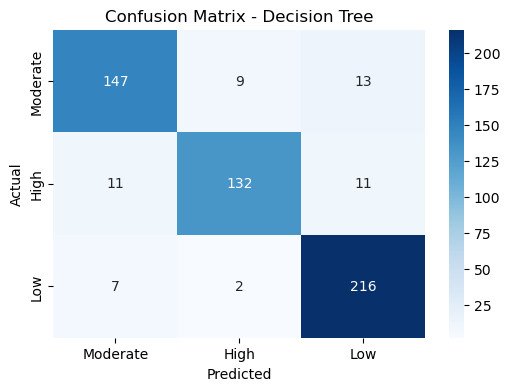

In [53]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### SVM

In [54]:
print("Model: SVM")
print(f"Accuracy: {acc_svm:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Model: SVM
Accuracy: 0.9544
Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.98      0.95       169
         Low       0.99      0.87      0.93       154
    Moderate       0.95      0.99      0.97       225

    accuracy                           0.95       548
   macro avg       0.96      0.95      0.95       548
weighted avg       0.96      0.95      0.95       548



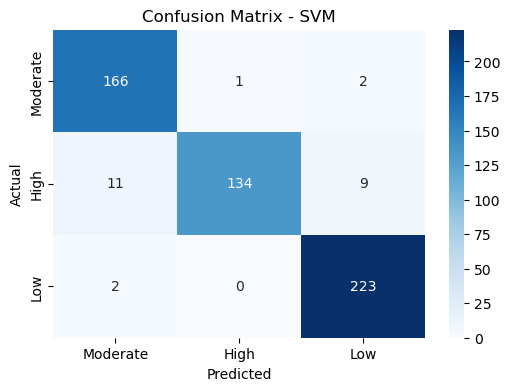

In [55]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Naive bayes

In [56]:
print("Model: Naive Bayes")
print(f"Accuracy: {acc_nb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Model: Naive Bayes
Accuracy: 0.9361
Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.92      0.92       169
         Low       0.96      0.88      0.92       154
    Moderate       0.93      0.99      0.96       225

    accuracy                           0.94       548
   macro avg       0.94      0.93      0.93       548
weighted avg       0.94      0.94      0.94       548



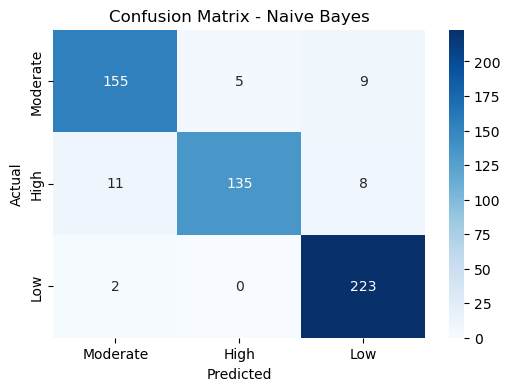

In [57]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Identifikasi Kelemahan Model**  

1. **Decision Tree**  
   - Kelemahan:  
     - Akurasi cukup baik (90.83%) namun masih terdapat kesalahan klasifikasi pada kelas "Low" dan "High".
     - F1-score untuk kelas "Low" (0.84) lebih rendah dibandingkan kelas lainnya, menunjukkan kesulitan model dalam mengenali kapal berperforma rendah.  
   - Indikasi Overfitting:  Berisiko overfitting tetapi tergolong aman.  

2. **SVM**
   - Kelemahan: 
     - Performa sangat baik secara keseluruhan (akurasi 95.44%), namun recall pada kelas "Low" (0.87) sedikit lebih rendah, mengindikasikan masih ada data kelas "Low" yang salah klasifikasi.  
     - Model SVM cenderung sensitif terhadap data yang tidak sepenuhnya terpisah secara linier, yang mungkin menyebabkan prediksi kurang akurat.  
   - Indikasi Overfitting/Underfitting:  Tidak ada indikasi overfitting. Model cukup stabil dan generalizable, tetapi performa masih bisa meningkat di kelas tertentu. 

3. **Naive Bayes**  
   - Kelemahan:
     - Akurasi baik (93.61%), namun masih terjadi kesalahan klasifikasi pada kelas "Moderate", terutama precision yang sedikit lebih rendah (0.93).  
     - Asumsi independensi antar fitur dalam Naive Bayes mungkin tidak sepenuhnya berlaku, menyebabkan sedikit kesalahan klasifikasi.  
   - Indikasi Overfitting/Underfitting:  Model cukup seimbang, tetapi bisa lebih baik jika fitur yang sangat berkorelasi dihilangkan atau dilakukan feature engineering.  

### **Rekomendasi Tindakan Lanjutan**  

1. Untuk Decision Tree: 
   - Lakukan pruning untuk mengurangi kompleksitas pohon dan menghindari overfitting.  
   - Coba Random Forest sebagai alternatif yang lebih stabil dengan agregasi beberapa pohon keputusan.  

2. Untuk SVM:  
   - Eksperimen dengan berbagai jenis kernel (misalnya polynomial atau sigmoid) untuk meningkatkan performa pada data yang tidak sepenuhnya terpisah secara linier.  

3. Untuk Naive Bayes:
   - Tambahkan fitur baru atau lakukan feature selection untuk mengurangi pengaruh asumsi independensi antar fitur.   

4. Secara Keseluruhan:  
   - Tambahkan lebih banyak data untuk meningkatkan generalisasi model dan melakukan cross-validation. 
   - Eksplorasi seperti Gradient Boosting (XGBoost) atau Neural Networks jika diperlukan peningkatan performa lebih lanjut.